In [30]:
import matplotlib.pyplot as plt 
import numpy as np
from statsmodels.stats.contingency_tables import Table
from scipy import linalg
import copy
import seaborn as sns
from sympy import Matrix
from scipy import stats

In [2]:
K = 17
L = len("Frem")
fname1 = ((K*L*23) % (20)) + 1
fname2 = ((fname1 + ((K*5 + L*7) % (19))) % (20)) + 1
print(f'X:{fname1}\nY:{fname2}')

X:5
Y:4


In [3]:
def countFreqs(to_cnt):
    char_cnt = {}
    for i in to_cnt.lower():
        if not char_cnt.get(i):
            char_cnt[i] = 1
        else:
            char_cnt[i] += 1
    return char_cnt
def countProbs(to_cnt):
    to_ret = {}
    char_cnt = countFreqs(to_cnt)
    for i in char_cnt.keys():
        to_ret[i] = char_cnt[i]/len(to_cnt)
    return to_ret

In [4]:
file1 = open(f'hw1-source/00{fname1}.txt','r')
file2 = open(f'hw1-source/00{fname2}.txt','r')

file1_string = file1.read().replace(',','').replace('\n','').lower()
file2_string = file2.read().replace(',','').replace('\n','').lower()
f1_freqs = dict(sorted(countFreqs(file1_string).items()))
f2_freqs = dict(sorted(countFreqs(file2_string).items()))

# 1

In [5]:
matrix = np.zeros((len(f1_freqs.keys()),len(f1_freqs.keys())))
matrix.shape

(27, 27)

In [6]:
def indices(a, b):
    first =  0 if not a.isalnum() else (ord(a) - ord('a')) + 1
    second = 0 if not b.isalnum() else (ord(b) - ord('a')) + 1
    return first, second

In [7]:
for i in range(len(file1_string) - 1):
    a, b = indices(file1_string[i],file1_string[i + 1])
    matrix[a,b] += 1

In [8]:
for i in range(matrix.shape[0]):
    matrix[i] /= f1_freqs[list(f1_freqs.keys())[i]]

Text(0.5, 1.0, 'Odhadnuté pravděpodobnosti přechodu')

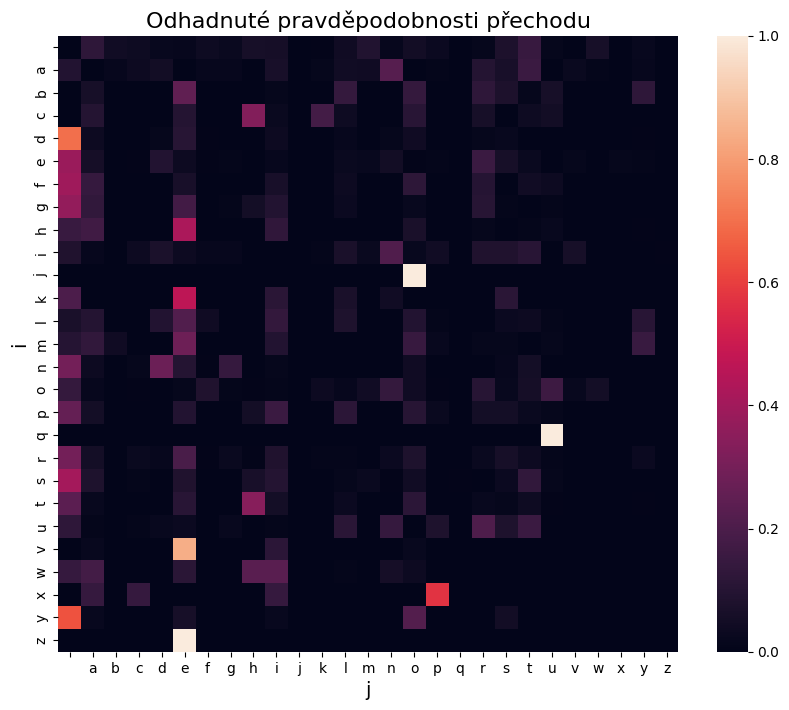

In [21]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(matrix, vmin=0, vmax=matrix.max(), xticklabels=list(f1_freqs.keys()), yticklabels=list(f1_freqs.keys()))
ax.set_xlabel('j', fontsize=14)
ax.set_ylabel('i', fontsize=14)
ax.set_title('Odhadnuté pravděpodobnosti přechodu', fontsize=16)

# 2

In [26]:
d = (matrix - np.eye(len(f1_freqs.keys()))).T #(P − I)^T
pi = linalg.null_space(d.astype("float32"),rcond= np.finfo(np.float32).eps*1000)
pi = (pi/sum(pi)).T
print(pi)
pi.shape

[[0.19880857 0.06993876 0.01193944 0.01561244 0.0402169  0.10043107
  0.01671475 0.01781465 0.050676   0.05801467 0.00055753 0.00827003
  0.0326861  0.02772809 0.04994734 0.05491338 0.01414854 0.00074114
  0.05048447 0.04627322 0.07087543 0.0180081  0.00808501 0.01652973
  0.00129203 0.01873499 0.00055765]]


(1, 27)

In [24]:
#kontrola π⋅P−π<ϵ
not False in pi.dot(matrix) - pi < np.finfo(np.float32).eps

True

# 3

In [44]:
chisq = 0
n = sum(list(f2_freqs.values()))
for i in range(len(f2_freqs)):
    chisq += ((list(f2_freqs.values())[i] - n*pi[0][i])**2)/(n*pi[0][i])

print(f'Chi^2 = {chisq}')

Chi^2 = 183.87368778773222


In [45]:
chi2 = stats.chi2.isf(0.05,26)
p = stats.chi2.sf(chisq, 26)
print(f'chi2: {chi2}\np: {p}')

chi2: 38.88513865983007
p: 1.0323436723161081e-25
